In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Visualizando patrones en series de tiempo


## Datos

In [27]:
# Cargamos los datos
df = pd.read_csv('./Ti_data.csv', index_col=0, parse_dates=True)
df

,Ti
2018-10-01 18:00:00,19.600
2018-10-01 18:30:00,19.580
2018-10-01 19:00:00,19.610
2018-10-01 19:30:00,19.671
2018-10-01 20:00:00,19.749
...,...
2019-04-29 15:30:00,19.380
2019-04-29 16:00:00,19.370
2019-04-29 16:30:00,19.361
2019-04-29 17:00:00,19.352


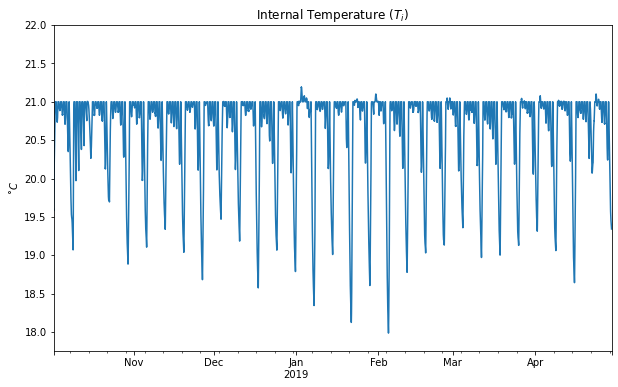

In [28]:
# Plot 
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df.plot(ax=ax, color='C0', legend=None)

ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');

# Visualizando patrones diurnos

In [29]:
# Separar día y hora
df['date'] = df.index.normalize()
df['time'] = df.index.time.astype(str)
df

,Ti,date,time
2018-10-01 18:00:00,19.600,2018-10-01,18:00:00
2018-10-01 18:30:00,19.580,2018-10-01,18:30:00
2018-10-01 19:00:00,19.610,2018-10-01,19:00:00
2018-10-01 19:30:00,19.671,2018-10-01,19:30:00
2018-10-01 20:00:00,19.749,2018-10-01,20:00:00
...,...,...,...
2019-04-29 15:30:00,19.380,2019-04-29,15:30:00
2019-04-29 16:00:00,19.370,2019-04-29,16:00:00
2019-04-29 16:30:00,19.361,2019-04-29,16:30:00
2019-04-29 17:00:00,19.352,2019-04-29,17:00:00


In [30]:
# Transformando el Dataframe
df_pivot = df.pivot(index='date', columns='time', values='Ti')
df_pivot


time,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,05:00:00,05:30:00,06:00:00,06:30:00,07:00:00,07:30:00,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.600,19.580,19.610,19.671,19.749,19.810,19.878,19.936,19.994,20.050,20.101,20.154
2018-10-02,20.201,20.251,20.298,20.345,20.393,20.437,20.485,20.528,20.574,20.616,20.657,20.697,20.736,20.778,20.822,20.868,20.916,20.967,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.980,20.951,20.933,20.909,20.892,20.872,20.854,20.839,20.819,20.809,20.790,20.783
2018-10-03,20.767,20.759,20.754,20.753,20.743,20.748,20.734,20.742,20.739,20.756,20.759,20.784,20.795,20.828,20.849,20.889,20.924,20.978,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.988,20.978,20.967,20.957,20.947,20.939,20.931,20.924,20.915,20.910,20.902,20.898
2018-10-04,20.892,20.888,20.887,20.885,20.885,20.886,20.886,20.890,20.889,20.897,20.892,20.903,20.896,20.911,20.914,20.939,20.947,20.981,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.988,20.974,20.958,20.944,20.927,20.915,20.897,20.886,20.869,20.860,20.847,20.840
2018-10-05,20.832,20.827,20.826,20.826,20.825,20.830,20.827,20.838,20.834,20.849,20.846,20.866,20.865,20.890,20.895,20.926,20.940,20.980,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.988,20.968,20.942,20.913,20.882,20.855,20.827,20.804,20.780,20.763,20.743,20.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,20.989,20.982,20.965,20.957,20.943,20.938,20.926,20.924,20.913,20.915,20.906,20.912,20.903,20.916,20.915,20.937,20.961,20.989,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.987,20.966,20.946,20.927,20.907,20.889,20.869,20.852,20.835,20.818,20.808,20.791
2019-04-26,20.785,20.776,20.756,20.751,20.736,20.737,20.731,20.739,20.743,20.760,20.769,20.795,20.808,20.842,20.860,20.901,20.928,20.979,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.987,20.964,20.936,20.912,20.886,20.865,20.840,20.823,20.800,20.787,20.768,20.759
2019-04-27,20.744,20.741,20.724,20.726,20.712,20.719,20.709,20.722,20.719,20.739,20.742,20.769,20.781,20.815,20.839,20.882,20.928,20.980,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.0,21.000,21.000,21.00,21.000,21.000,21.000,20.986,20.962,20.931,20.896,20.858,20.819,20.778,20.736,20.694,20.653,20.611,20.570


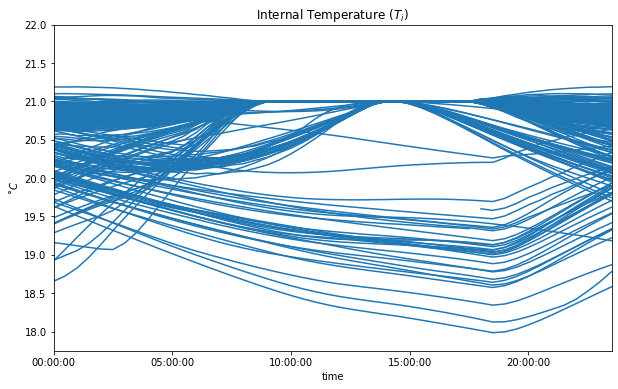

In [31]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_pivot.T.plot(ax=ax, color='C0', legend=False)
ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');

# Transparencia: alpha

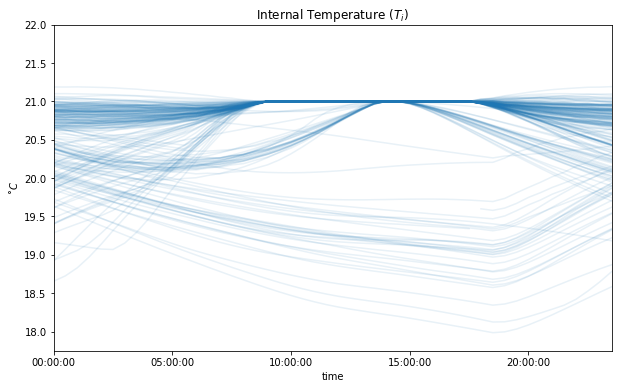

In [32]:
# Plot con transparencia
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False) #alpha: Nivel de transparencia
ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');


# Cambiamos el horario de comienzo

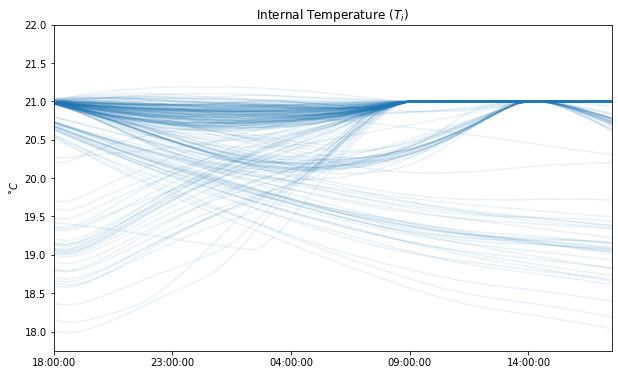

In [33]:
# Sabemos que empieza a las 18:00, queremos pasar de las 00 a las 18h: 
# 18 horas son 36 medias horas. 
df_roll = pd.DataFrame(index=df_pivot.index, 
                       columns=np.roll(df_pivot.columns, -36), 
                       data=np.roll(df_pivot.values, -36))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_roll.T.plot(ax=ax, color='C0', alpha=0.1, legend=False)
ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');


# Visualizando patrones diurnos y semanales

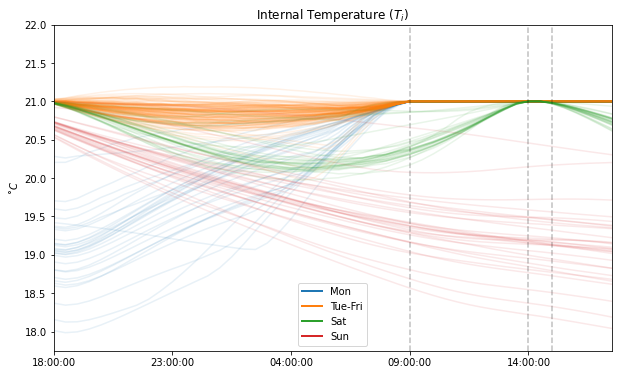

In [34]:
day_colors = { 'Monday': 'C0', 
               'Tuesday': 'C1',
               'Wednesday': 'C1',
               'Thursday': 'C1',
               'Friday': 'C1',
               'Saturday': 'C2',
               'Sunday': 'C3'}

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for day_name, color in day_colors.items():
    # NOTE: we are plotting the transposed DataFrame
    df_roll[df_roll.index.day_name() == day_name].T.plot(
        ax=ax, color=color, alpha=0.1, legend=None)

ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)

#Líneas verticales definiendo los horarios de calefacción
ax.axvline(30, alpha=0.25, color='black', linestyle='--')
ax.axvline(40, alpha=0.25, color='black', linestyle='--')
ax.axvline(42, alpha=0.25, color='black', linestyle='--')

ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');

# Leyenda:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=2),
                Line2D([0], [0], color='C1', lw=2),
                Line2D([0], [0], color='C2', lw=2),
                Line2D([0], [0], color='C3', lw=2)]

ax.legend(custom_lines, ['Mon', 'Tue-Fri', 'Sat', 'Sun']);
